# HR Analytics#

Within this dataset, the question we are trying to answer is why do employees leave their company early? 

A couple of things to note is that this dataset is simulated as noted on Kaggle, and I also looked up how other people have answered this question to get some inspiration when I got stuck.

In [1]:
import os

import math

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 20)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
df = pd.read_csv("HR_comma_sep.csv")

In [3]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


Listing out all of the columns to see what this dataset has to offer.

In [4]:
df.columns 

Index([u'satisfaction_level', u'last_evaluation', u'number_project',
       u'average_montly_hours', u'time_spend_company', u'Work_accident',
       u'left', u'promotion_last_5years', u'sales', u'salary'],
      dtype='object')

In [5]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

Since "sales" and "salary" is an object, let us see what it holds

In [6]:
df['sales'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [7]:
df['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [8]:
df['left'].unique()

array([1, 0])

Let us also see if there is anything missing in this dataset

In [9]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

Let us check out sales and salary in more detail

In [10]:
df.groupby('sales').sum()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
sales,,,,,,,,
IT,758.46,879.55,4683,248119,4256,164,273,3
RandD,487.80,560.44,3033,158030,2650,134,121,27
accounting,446.51,550.49,2934,154292,2702,96,204,14
hr,442.52,523.84,2701,146828,2480,89,215,15
management,391.45,456.12,2432,126787,2711,103,91,69
marketing,530.76,614.23,3164,171073,3063,138,203,43
product_mng,558.91,644.71,3434,180369,3135,132,198,0
sales,2543.81,2938.23,15634,831773,14631,587,1014,100
support,1378.19,1611.81,8479,447490,7563,345,555,20


In [11]:
df.groupby('salary').sum()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
salary,,,,,,,,
high,788.55,871.25,4660,247236,4568,192,82,72
low,4395.11,5245.70,27800,1470491,25154,1040,2172,66
medium,4008.23,4623.86,24582,1297827,22748,937,1317,181


In [12]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


Below, I find that "satisfaction level" and "left" has the greatest correlation based on the question we are trying to answer

In [13]:
df.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


Created a heat map to better show the correlation between "satisifaction_level", and "left"

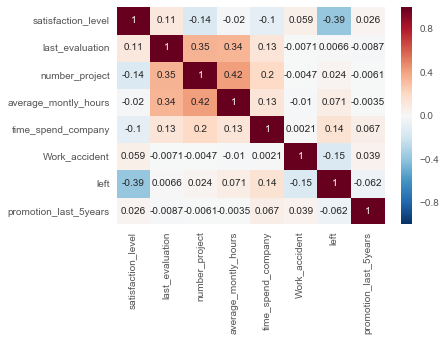

In [14]:
sns.heatmap(df.corr(), vmax=1, annot=True)

In [15]:
model = smf.ols(formula = 'left ~ satisfaction_level', data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   left   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     2664.
Date:                Sat, 17 Jun 2017   Prob (F-statistic):               0.00
Time:                        20:47:06   Log-Likelihood:                -7254.4
No. Observations:               14999   AIC:                         1.451e+04
Df Residuals:                   14997   BIC:                         1.453e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.6458      0.009     75.754      0.000       0.629       0.663
satisfaction_level    -0.6653      0.013    -51.613      0.000      -0.691      -0.640
==============================================================================
Omnibus:                     1841.716   Durbin-Watson:                   0.307
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2616.660
Skew:                           1.022   Prob(JB):                         0.00
Kurtosis:                       2.899   Cond. No.                         5.60
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Face this as a classification problem. dont do regression. Use crosstab on "left" to see how it compares to "satisfaction_level". look at the titantic dataset to get some insight on how to go along with this. use pyplot

Logistic Regression analysis, and if have time, do random forest. 

Look into PCA